Luis Sebastián Chavarría Cerda
1807660

# Preambulo problemas 4 y 5

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets
import numpy as np

In [ ]:
# El conjunto de datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Modificacion para que las imagenes tengan la estructura correcta
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,
 y_train, test_size = 0.05,
random_state = 0)

In [ ]:
def normalize(data):
 data = data.astype("float32")
 data = data/255.0
 return data

In [ ]:
x_train = normalize(x_train)
x_val = normalize(x_val)
x_test = normalize(x_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = range(10)
def results(model,epoch=20):
  r = model.fit(x_train, y_train, batch_size = 32,
                epochs = epoch, 
                validation_data = (x_val, y_val), 
                verbose = 1)
  acc = model.evaluate(x_test, y_test)
  print("test set loss : ", acc[0])
  print("test set accuracy :", acc[1]*100)
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()
  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

def predict_class(filename, model):
  img = load_img(filename,target_size=( 28 , 28, 3)) # Lectura como imagen a color
  plt.imshow(img,cmap='Greys')
  img = img_to_array(img) 
  img = np.mean(img, axis=2)  # Promedio de los 3 canales en un solo canal
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  result = model.predict(img)
  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = classes[i]
  res = result[0]
  res.sort()
  res = res[::-1]
  results = res[:3]
  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]],
                           (results[i]*100).round(2)))
  print('The image given as input is')

# 4. (30 puntos) Ajusta una red neuronal profunda con capas densas (sin capas de convolucion) para predicción.

Nota 1: Debes especificar la estructura de la red que estas usando, su cantidad de parametros y comentar sobre en que epoca se comienza a notar un sobreajuste.

Nota 2: Debes verificar el rendimiento de tu modelo sobre al menos una imagen creada por ti.

Nota 3: Puedes entregar más de un modelo.

Nota 4: Quien tenga el mayor accuracy recibirá 20 puntos extras.

Epoch 1/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.8914 - accuracy: 0.7209 - val_loss: 0.2535 - val_accuracy: 0.9277
Epoch 2/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.9166 - val_loss: 0.1871 - val_accuracy: 0.9463
Epoch 3/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.2186 - accuracy: 0.9350 - val_loss: 0.1632 - val_accuracy: 0.9493
Epoch 4/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.1906 - accuracy: 0.9432 - val_loss: 0.1440 - val_accuracy: 0.9597
Epoch 5/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.1670 - accuracy: 0.9501 - val_loss: 0.1287 - val_accuracy: 0.9620
Epoch 6/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.1519 - accuracy: 0.9548 - val_loss: 0.1247 - val_accuracy: 0.9610
Epoch 7/20
1782/1782 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9571 - val_loss: 0.1243 - val_accuracy:

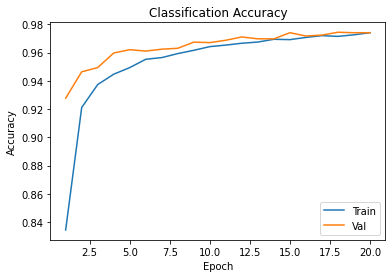

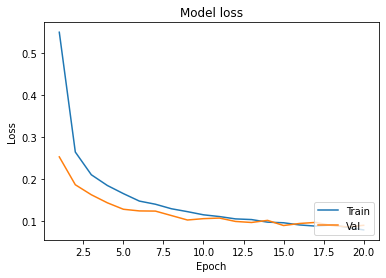

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization
model_1 = Sequential([
 Flatten(), # Esto colapsa las imagenes en un vector de una dimension
  ## TU ARQUITECTURA
 Dense(32, activation = 'relu', input_shape = (28, 28, 1)),
 BatchNormalization(),
 Dense(64, activation='relu'),
 BatchNormalization(),
 Dense(32, activation='relu'),
 Dense(10, activation = 'softmax')
])
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) ## PUEDES MODIFICAR EL OPTIMIZADOR
model_1.compile(optimizer=opt, loss =  'categorical_crossentropy',##### Coloca la funcion de perdida adecuada
 metrics = ['accuracy'])
results(model_1)

Para este ejercicio use una red con una capa de entrada, una capa densa de salida y 3 capas densas ocultas. 
La red comienza con la capa de entrada formada por 784 inputs, seguida de una capa densa con 32 neuronas que usa la función de activación relu, después de esto utilice el método batch normalization, y después otra capa densa con 64 neuronas usando la función relu, para después usar batch normalization de nuevo, luego use otra capa densa de 32 neuronas también con la función relu, por la capa de salida formada por 10 neuronas (una por numero 0 a 9) y la función de activación softmax para obtener la probabilidad de que pertenezca a cada categoría. 
Las épocas terminaron antes de presentar un sobre ajuste aunque anteriormente si tardo un poco en ajustarse apropiadamente.
A continuación, se muestra el numero de parametros resultantes:

In [ ]:
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                25120     
_________________________________________________________________
batch_normalization_17 (Batc (None, 32)                128       
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 10)              

Top predictions of these images are
2 : 99.98
3 : 0.0
4 : 0.0
The image given as input is


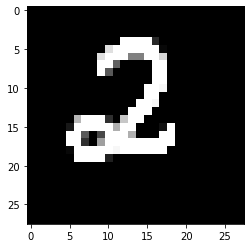

In [ ]:
predict_class("/content/2.png", model_1)

Top predictions of these images are
5 : 99.97
3 : 0.03
9 : 0.0
The image given as input is


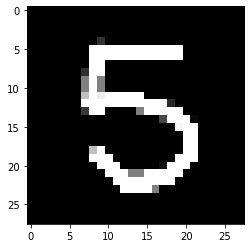

In [ ]:
predict_class("/content/5.png", model_1)

Top predictions of these images are
7 : 99.35
3 : 0.59
2 : 0.03
The image given as input is


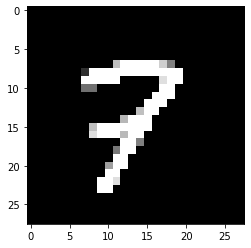

In [ ]:
predict_class("/content/7.png", model_1)

Top predictions of these images are
9 : 99.84
7 : 0.07
3 : 0.06
The image given as input is


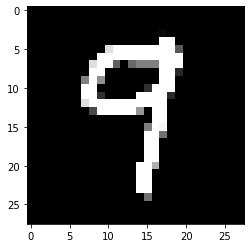

In [ ]:
predict_class("/content/9.png", model_1)

# 5. (30 puntos) Ajusta una red neuronal convolucional (con al menos una capa convolucional) para predicción.

Nota 1: Debes especificar la estructura de la red que estas usando, su cantidad de parametros y comentar sobre en que epoca se comienza a notar un sobreajuste.

Nota 2: Debes verificar el rendimiento de tu modelo sobre al menos una imagen creada por ti.

Nota 3: Puedes entregar más de un modelo.

Nota 4: Quien tenga el mayor accuracy recibirá 20 puntos extras.

Epoch 1/20
1782/1782 [==============================] - 40s 4ms/step - loss: 1.4603 - accuracy: 0.4955 - val_loss: 0.1513 - val_accuracy: 0.9547
Epoch 2/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.1361 - accuracy: 0.9592 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 3/20
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0986 - accuracy: 0.9693 - val_loss: 0.0666 - val_accuracy: 0.9797
Epoch 4/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0615 - val_accuracy: 0.9827
Epoch 5/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.0492 - val_accuracy: 0.9850
Epoch 6/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0588 - val_accuracy: 0.9810
Epoch 7/20
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0454 - accuracy: 0.9854 - val_loss: 0.0384 - val_accuracy

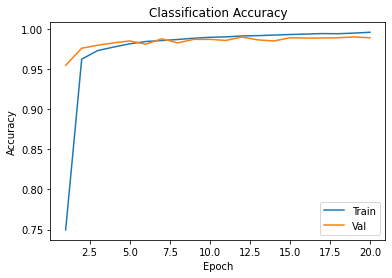

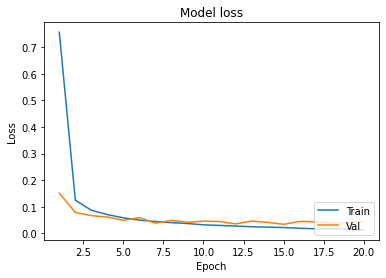

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization
model_2 = Sequential([
 Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
 Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
 MaxPooling2D((2, 2)),
 Conv2D(28, (3, 3), activation = 'relu', padding = 'same'),
 Conv2D(28, (3, 3), activation = 'relu', padding = 'same'),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(32, activation = 'relu'),
 Dense(64, activation='relu'),
 Dense(32, activation='relu'),
 Dense(10, activation = 'softmax')
])
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) ## PUEDES MODIFICAR EL OPTIMIZADOR
model_2.compile(optimizer=opt, loss = 'categorical_crossentropy',##### Coloca la funcion de perdida adecuada,
 metrics = ['accuracy'])
results(model_2)

Para este ejercicio use una estructura de red formada por una capa de entrada, una capa de salida y 4 capas convolucionales y 3 capas densas ocultas.
La red comienza con las imágenes enviándose a una capa de convolución con la función de activación relu y utilizando 32 kernels de 3x3, seguida de otra capa de convolución con las mismas características para después hacer un max pooling con un kernel de 2x2  y llegar a otra capa de convolución pero esta vez de 28 kernels 3x3 con función de activación relu seguido de otra red de convolución con las mismas características y de nuevo un max pooling con un kernel 2x2 para después llegar a la función flatten que nos ayuda a aplanar nuestra matriz en un vector y de aquí entra a una capa densa con 32 neuronas que usa la función de activación relu, después otra capa densa con 64 neuronas usando la función relu, luego use otra capa densa de 32 neuronas también con la función relu, por la capa de salida formada por 10 neuronas (una por numero 0 a 9) y la función de activación softmax para obtener la probabilidad de que pertenezca a cada categoría. 
A continuación, se muestra el numero de parametros resultantes:

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 28)        8092      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 28)        7084      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1372)             

Top predictions of these images are
2 : 100.0
7 : 0.0
3 : 0.0
The image given as input is


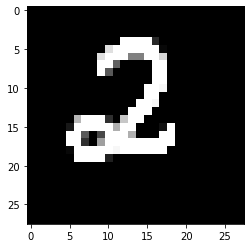

In [ ]:
predict_class("/content/2.png", model_2)

Top predictions of these images are
5 : 100.0
8 : 0.0
6 : 0.0
The image given as input is


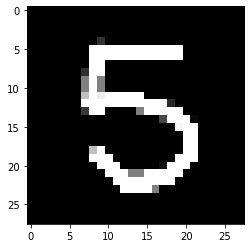

In [ ]:
predict_class("/content/5.png", model_2)

Top predictions of these images are
7 : 99.68
3 : 0.32
8 : 0.0
The image given as input is


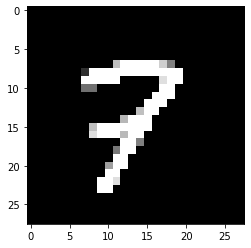

In [ ]:
predict_class("/content/7.png", model_2)

Top predictions of these images are
9 : 97.92
7 : 1.34
8 : 0.74
The image given as input is


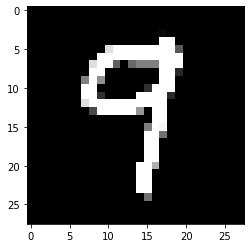

In [ ]:
predict_class("/content/9.png", model_2)